In [27]:
import os
import pydotplus
import numpy as np
import pandas as pd
import seaborn as sns
import pydotplus as pdp
from sklearn import tree
from graphviz import Source
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree

# Question 5

df = pd.read_csv("thyroid.csv")
display(df)

,T3_resin,Serum_thyroxin,Serum_triiodothyronine,Basal_TSH,Abs_diff_TSH,Outcome
0,107.0,10.1,2.2,0.9,2.7,1.0
1,NaN,9.9,3.1,2.0,5.9,1.0
2,127.0,12.9,2.4,NaN,0.6,1.0
3,109.0,NaN,1.6,1.4,1.5,1.0
4,105.0,7.3,1.5,NaN,-0.1,1.0
...,...,...,...,...,...,...
180,88.0,16.5,4.9,0.8,0.1,2.0
181,97.0,15.1,1.8,1.2,-0.2,2.0
182,106.0,13.4,3.0,1.1,0.0,NaN
183,79.0,19.0,5.5,NaN,0.3,2.0


In [28]:
# 5_a

for col in df.columns:   
    x=pd.to_numeric(df[col], errors='coerce')
    idx = x.isna()
    seen = set()
    uniq = [x for x in df[idx][col] if x not in seen and not seen.add(x)]
    for j in df[idx][col]:
        df[col] = df[col].replace({j : np.NaN})

MyDataFram = df[~df['Outcome'].isna()]
convert_dict = {'Serum_thyroxin': float, 'Serum_triiodothyronine': float, 'Basal_TSH' : float} 
MyDataFram = MyDataFram.astype(convert_dict)

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(MyDataFram)
my_array = imp.transform(MyDataFram)
MyDataFram = pd.DataFrame(my_array, columns = df.columns)
display(MyDataFram)

,T3_resin,Serum_thyroxin,Serum_triiodothyronine,Basal_TSH,Abs_diff_TSH,Outcome
0,107.000000,10.100000,2.2,0.90000,2.7,1.0
1,108.233129,9.900000,3.1,2.00000,5.9,1.0
2,127.000000,12.900000,2.4,1.28875,0.6,1.0
3,109.000000,10.814024,1.6,1.40000,1.5,1.0
4,105.000000,7.300000,1.5,1.28875,-0.1,1.0
...,...,...,...,...,...,...
169,105.000000,12.000000,3.3,1.28875,0.0,2.0
170,88.000000,16.500000,4.9,0.80000,0.1,2.0
171,97.000000,15.100000,1.8,1.20000,-0.2,2.0
172,79.000000,19.000000,5.5,1.28875,0.3,2.0


<AxesSubplot:>

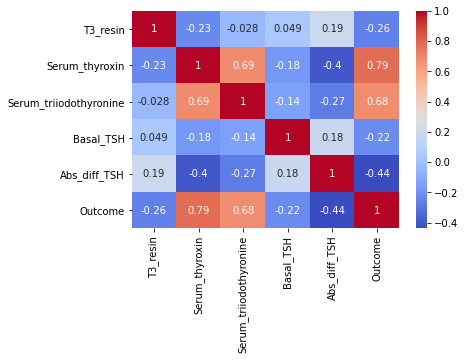

In [29]:
# 5_b

sns.heatmap(MyDataFram.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [30]:
# 5_c

MyDataFram['Outcome'].value_counts()
# Dataset is impbalance

1.0    144
2.0     30
Name: Outcome, dtype: int64

In [31]:
To_Resample = MyDataFram[MyDataFram['Outcome'] == 2]
After_Resample =To_Resample.sample(n = 114, replace = True)
MyDataFram_New = pd.concat([After_Resample, MyDataFram])

In [32]:
MyDataFram_New['Outcome'].value_counts()
# Dataset is balance now

2.0    144
1.0    144
Name: Outcome, dtype: int64

In [33]:
# 5_d

y = MyDataFram_New[['Outcome']]
x = MyDataFram_New.drop(['Outcome'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

[Text(465.0, 713.475, 'X[1] <= 11.95\ngini = 0.5\nsamples = 230\nvalue = [118, 112]'),
 Text(279.0, 509.625, 'X[0] <= 95.5\ngini = 0.101\nsamples = 113\nvalue = [107, 6]'),
 Text(186.0, 305.775, 'X[2] <= 1.85\ngini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(93.0, 101.92499999999995, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(279.0, 101.92499999999995, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(372.0, 305.775, 'gini = 0.0\nsamples = 104\nvalue = [104, 0]'),
 Text(651.0, 509.625, 'X[2] <= 1.55\ngini = 0.17\nsamples = 117\nvalue = [11, 106]'),
 Text(558.0, 305.775, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(744.0, 305.775, 'gini = 0.086\nsamples = 111\nvalue = [5, 106]')]

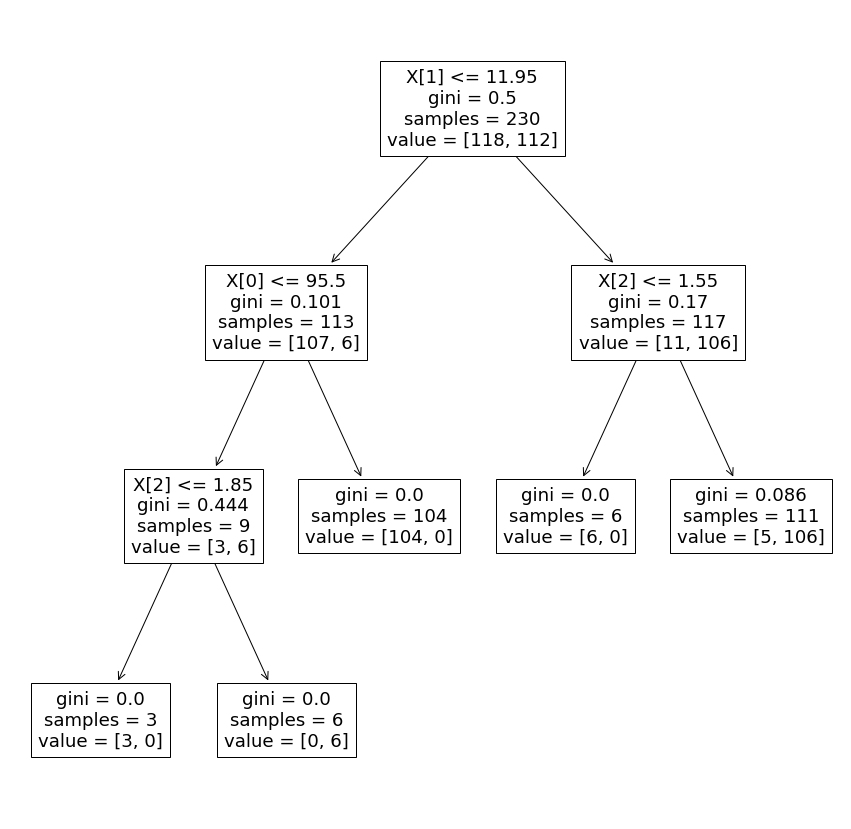

In [34]:
# 5_e

y_names = ["1.0", "2.0"]
x_names = ["T3_resin", "Serum_thyroxin", "Serum_triiodothyronine", "Basal_TSH", "Abs_diff_TSH"]
cart01 = DecisionTreeClassifier(criterion = "gini", max_leaf_nodes = 5).fit(x_train, y_train)

fig, axs = plt.subplots(1, 1, figsize=(15,15))
tree.plot_tree(cart01, ax=axs)

In [35]:
# 5_f

score = cart01.score(x_test, y_test)
display(score)

1.0

In [36]:
# 5_g

max_score = 0
best_max_depth = 0
for i in range(1, 10):
    Decision_Tree = DecisionTreeClassifier(criterion = "gini", max_depth = i).fit(x_train, y_train)
    score = Decision_Tree.score(x_test, y_test)
    if score > max_score:
        max_score = score
        best_max_depth = i
    print("accuracy for max_depth = ", i, ' : ', score)

print('\n\nBest Max_depth = ', best_max_depth)

accuracy for max_depth =  1  :  0.9310344827586207
accuracy for max_depth =  2  :  1.0
accuracy for max_depth =  3  :  1.0
accuracy for max_depth =  4  :  1.0
accuracy for max_depth =  5  :  1.0
accuracy for max_depth =  6  :  1.0
accuracy for max_depth =  7  :  1.0
accuracy for max_depth =  8  :  1.0
accuracy for max_depth =  9  :  1.0


Best Max_depth =  2


In [37]:
# 5_h

cart01.feature_importances_

array([0.06987453, 0.79363714, 0.13648833, 0.        , 0.        ])

In [38]:
# 5_i

Decision_Tree = DecisionTreeClassifier(criterion = "gini", max_depth = best_max_depth).fit(x_train, y_train)
export_graphviz(Decision_Tree, out_file = "Decision_Tree.dot", class_names = y_names, feature_names = x_names)

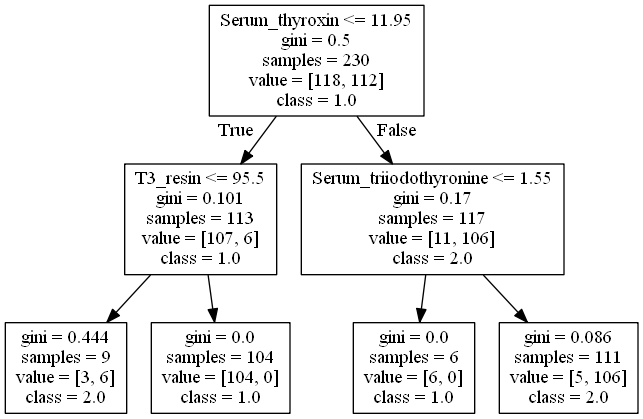

In [39]:
# 5_j

os.environ['PATH'] = os.environ['PATH']+ ';' + os.environ['CONDA_PREFIX']+ r'\Library\bin\graphviz'
s = pdp.graph_from_dot_file("Decision_Tree.dot")
Image(s.create_png())